In [137]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib
from matplotlib import transforms, pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
#
# %matplotlib inline

In [152]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    plt.legend(fontsize=15)
    # сделать по 2 графика для двух df
    # первый график
    ax1.set_title(label1)
    for col in col_list:
        sns.kdeplot(x=col, data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    for col in col_list:
        sns.kdeplot(x=col, data=df2[col_list], ax=ax2)
    plt.show()

# Выбрать один или несколько наборов данных (датасетов) для решения следующих задач. Каждая задача может быть решена на отдельном датасете, или несколько задач могут быть решены на одном датасете. Просьба не использовать датасет, на котором данная задача решалась в лекции.

In [139]:
data = pd.read_csv('./books.csv', sep=',', encoding="utf-8")
data.head(1)

,BookID,Title,Authors,Average_rating,ISBN,ISBN13,Language_code,Num_pages,Ratings_count,Text_reviews_count,Publication_date,Publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.


In [140]:
data = data.reset_index(drop=True)
enc = OrdinalEncoder(categories='auto', dtype=int)
data[["BookID"]] = enc.fit_transform(data[["BookID"]])
row_date_data = data["Publication_date"]
date_data = row_date_data.str.split('/',expand=True)
date_data.columns = ["Publication_month", "Publication_day", "Publication_year"]
date_data = date_data[["Publication_month", "Publication_year"]]
date_data.head(1)
data["Publication_month"] = pd.to_numeric(date_data["Publication_month"])
data["Publication_year"] = pd.to_numeric(date_data["Publication_year"])
data = data.drop(columns="ISBN")
data = data.drop(columns="ISBN13") # удалю признаки номера и категориальные, т.к. далее в обработке они не участвуют
data = data.drop(columns="Title")
data = data.drop(columns="Authors")
data = data.drop(columns="Language_code")
data = data.drop(columns="Publication_date")
data = data.drop(columns="Publisher")
data.head(1)

,BookID,Average_rating,Num_pages,Ratings_count,Text_reviews_count,Publication_month,Publication_year
0,0,4.57,652,2095690,27591,9,2006


In [141]:
# DataFrame не содержащий целевой признак Average_rating
X_ALL = data.drop(['BookID','Average_rating'], axis=1)

In [142]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [143]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Average_rating'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((8898, 5), (2225, 5))

# масштабирование признаков (не менее чем тремя способами)

## 1) Масштабирование данных на основе Z-оценки
### x′=(x−μ(x))/σ(x)
### где x - признак, μ(x)=mean(x) - среднее значение, σ(x)=std(x) - среднеквадратичное отклонение.

In [144]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled = arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled.head(1)

,Num_pages,Ratings_count,Text_reviews_count,Publication_month,Publication_year
0,1.308751,18.469833,10.498316,0.7183,0.707055


In [145]:
X_ALL.head(1)

,Num_pages,Ratings_count,Text_reviews_count,Publication_month,Publication_year
0,652,2095690,27591,9,2006


No handles with labels found to put in legend.


TypeError: _bivariate_kdeplot() got multiple values for argument 'x'

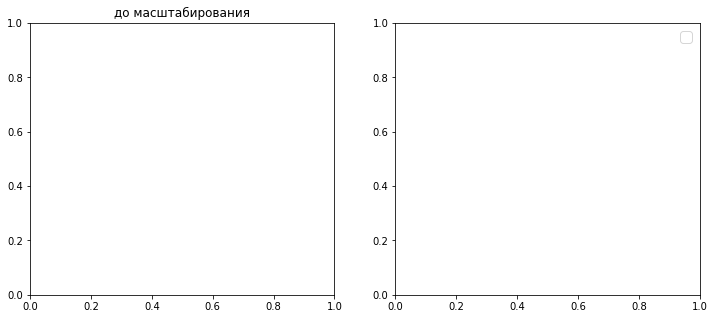

In [153]:
draw_kde(['Ratings_count', 'Text_reviews_count'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [99]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

c:\program files\python37\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


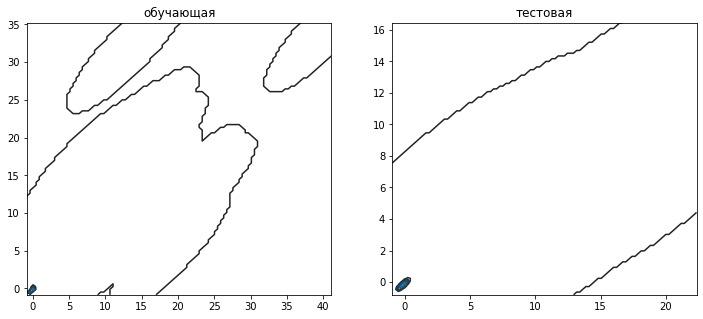

In [100]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde(['Ratings_count', 'Text_reviews_count'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

In [ ]:
# 2) 

In [ ]:
# 3) 

In [ ]:
# обработка выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов)

In [ ]:
# обработка по крайней мере одного нестандартного признака (который не является числовым или категориальным)

In [ ]:
# отбор признаков:
## один метод из группы методов фильтрации (filter methods)

In [ ]:
# один метод из группы методов обертывания (wrapper methods)

In [ ]:
# один метод из группы методов вложений (embedded methods)